# Gestion des erreurs et des exceptions

## Erreurs d’exécution

Toute erreur non attendue durant l’exécution d’une application .NET lance une exception.

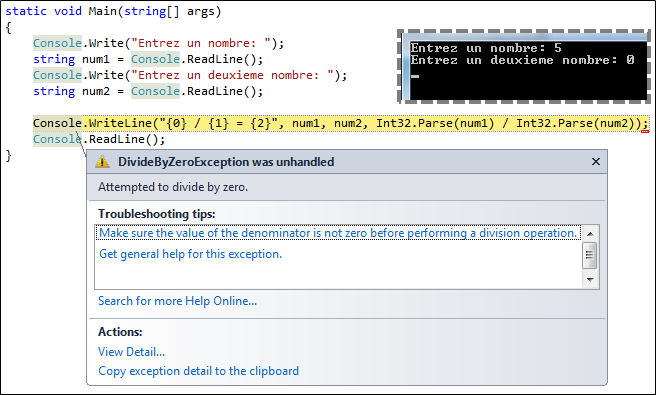

In [5]:
int index = 6;
int val = 44;
int[] a = new int[5];

try
{
    a[index] = val;
}
catch (IndexOutOfRangeException e)
{
    Console.WriteLine("Index out of bounds ");
}

Console.WriteLine("Le reste du programme");

Index out of bounds 
Le reste du programme



(9,33): warning CS0168: The variable 'e' is declared but never used



Un programmeur peut également décider de lancer une erreur lui même.

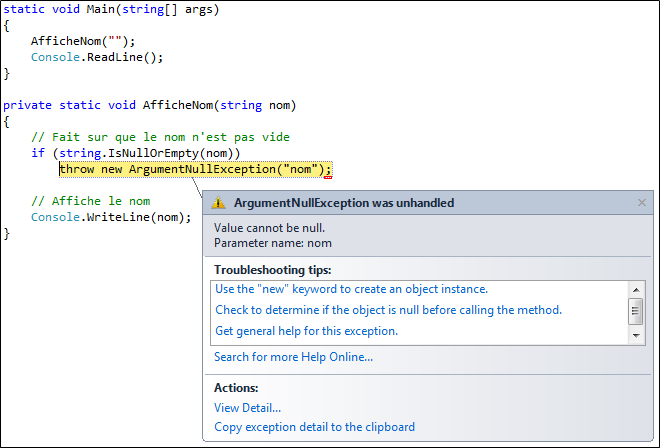

## Exceptions

Une erreur d’exécution en .NET est appelée« `Exception` ».

Une exception est toute classe héritant de la classe de base « `System.Exception` ».

- Puisqu’une exception est de base une classe, la gestion d’erreur en .NET peut être très descriptive grâce à la possibilité d’ajouter plusieurs champs et méthodes membres.
- ~~Toute exception lancée par .NET dérive de « `System.SystemException` ».~~
- ~~Toute exception personnalisée lancée par un programmeur devrait (mais pas toujours) dériver de « `System.ApplicationException` ».~~

En .NET, une exception est dite « lancée » et non « déclenchée ».


Toute exception comprend à la base plusieurs propriétés optionnelles telles que:

- `Data` : Un dictionnaire contenant de l’information additionnelle sur l’erreur
- `InnerException` : L’exception précédente qui a causé le lancement de cette exception
- `Message` : Un message textuel expliquant l’erreur
- `StackTrace` : Une liste de méthodes indiquant quelle méthode a lancé l’exception


## Gestion d’exceptions

Il est possible de prévoir le lancement d’une exception,  donnant donc la chance de récupérer correctement.

La gestion d’exception est composée de plusieurs blocs:

- Bloc de code « `try` » où une exception peut se produire.
- Bloc(s) de code « `catch` » qui attrape et traite une exception afin de pouvoir essayer de récupérer.
- Bloc de code optionnel « `finally` » qui est exécuté à la fin de l’exécution réussie du bloc « `try` » ou d’un bloc « `catch` ».

Si une exception est lancée sans gestion (bloc « `try` »), l’exécution pour la méthode courante arrête.

- L’exécution va seulement pouvoir continuer si l’erreur est attrapée par un bloc « `catch` » plus haut dans l’hiérarchie de méthode.


### bloc « `try` »

Ce bloc, délimité par des accolades, indique que toutes exceptions se produisant à l’intérieur devraient être passées aux blocs « `catch` » suivants:

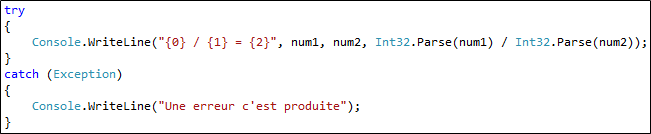

  > Note: comme tout autre bloc de code en C# (délimité par des accolades), toute variables déclarées à l’intérieur sont seulement accessible à l’intérieur de ce même bloc.


### bloc « `catch` »

Ce bloc sert à attraper et traiter les exceptions qui ont été lancées à l’intérieur du bloc « try »
Le type d’exception que le bloc attrape peut être spécifié.

Un bloc « `catch` » est constitué de:
- Mot clé « `catch` »
- Type d’exception optionnel entre parenthèse
- Variable optionnel représentant l’instance de l’exception attrapée

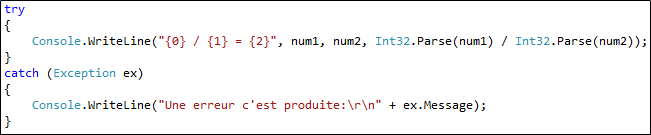

La gestion d’exceptions en .NET permet d’avoir plus d’un bloc « `catch` ».

Les exceptions les plus pointues devraient être les premières tandis que les exceptions les plus génériques devraient être les dernières.

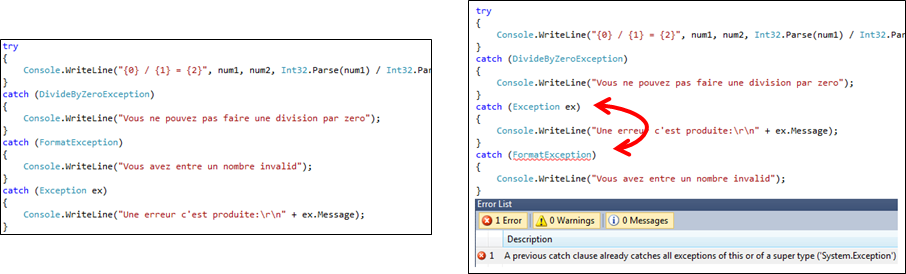

### Exemples

Ouvrir un fichier avec `System.IO.File.OpenRead()` peut lancer une de ces exceptions:

- `SecurityException`
- `ArgumentException`
- `ArgumentNullException`
- `PathTooLongException`
- `DirectoryNotFoundException`
- `UnauthorizedAccessException`
- `FileNotFoundException`
- `NotSupportedException`

Une nouvelle exception ou l’exception courante peut être relancée à partir du bloc « `catch` ».
- L’exception va donc monter l’hiérarchie de la pile (stack) jusqu’à ce qu’un autre try-catch attrape l’exception.

Pour lancer une exception parvenant du bloc « `catch` », il suffit d’utiliser le mot clé « `throw` », suivi de l’exception.
- Ceci va donc automatiquement mettre à jour la propriété « `StackTrace` » de l’exception pour indiquer que l’exception parvient du bloc « `catch` » à l’intérieur de la méthode courante

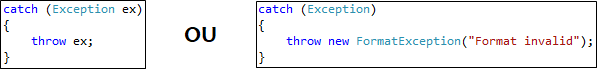

Pour relancer une exception en gardant la valeur de la propriété « `StackTrace` » intacte, il suffit simplement d’utiliser le mot clé « `throw` » sans exception.

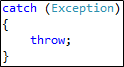

In [23]:
try
{
    int a = 5;
    int b = 0;
    int c = a / b;
}
catch (Exception e)
{  
    throw;                                   // a) Continuation de l'exception
    throw new Exception("Un message...", e); // b) L'exception et le StackTrace sont maintenant dans une exception parente
    throw new Exception("Un message...");    // c) Remplacement de l'exception et de son StackTrace 
    throw e;                                 // d) "Reset" du StackTrace (même exception)
}

Unhandled exception: System.DivideByZeroException: Attempted to divide by zero.
   at Submission#26.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

### bloc « finally »

Ce bloc, délimité par des accolades, sert à exécuter du code après l’exécution réussie du bloc « `try` » ou d’un bloc « `catch` ».

Ce bloc sert habituellement à « nettoyer » des variables/objets ou exécuter n’importe quoi d’autre peu importe s’il y a eu une exception.


## Exemple de gestion d’exceptions

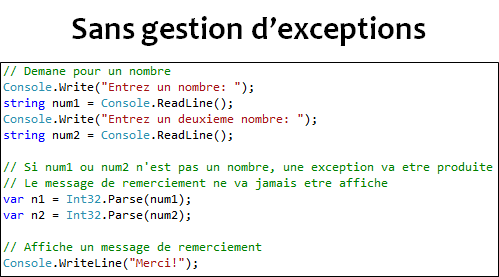

Le message de remerciement ne va jamais être affiché s’il y a une exception puisque l’exécution va arrêter à l’erreur ou va remonter dans l’hiérarchie des méthodes jusqu’au premier `try-catch` trouvé.


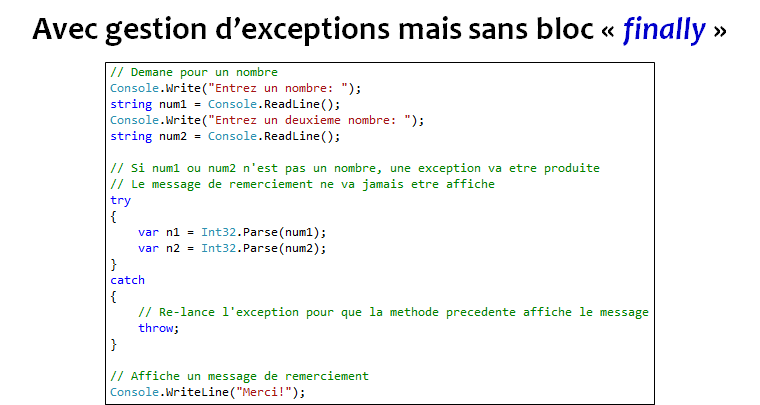

Le message de remerciement ne va jamais être affiché s’il y a une exception puisque l’exécution va arrêter au « `throw` » ou va remonter dans l’hiérarchie des méthodes jusqu’au premier `try-catch` trouvé.


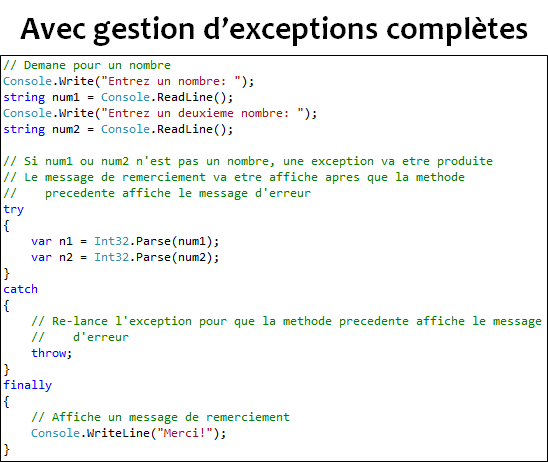

Le message de remerciement va toujours être affiché (tant qu’il y a un `try-catch` plus haut dans l’hiérarchie des méthodes).


Il est également possible d’avoir des try-catch à l’intérieur de blocs « `try` », « `catch` » ou « `finally` ».

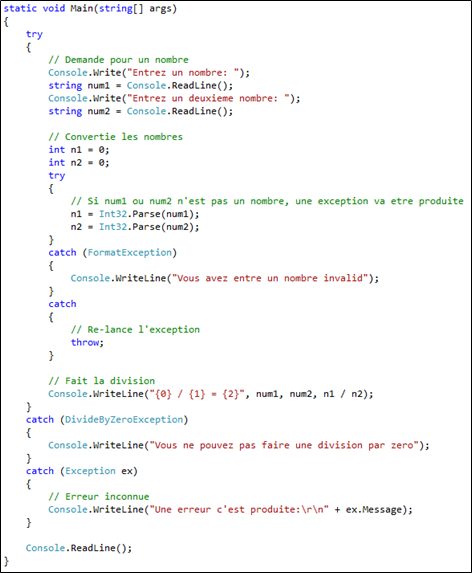

## Exception personnalisée

Un nouveau type d’exception peut être défini par un programmeur.

Afin de créer un nouveau type d’exception, il suffit de créer une nouvelle classe et d’hériter de la classe « `Application` ».

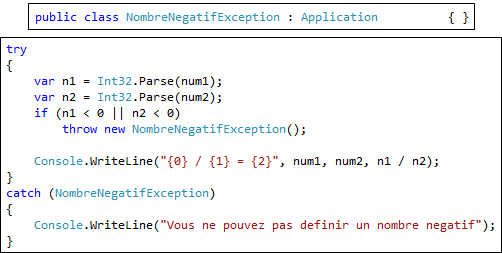

## Les filtres d'exceptions

Il est possible de filtrer les exceptions à l’aide de filtres placés sur les bloc « `catch` ».

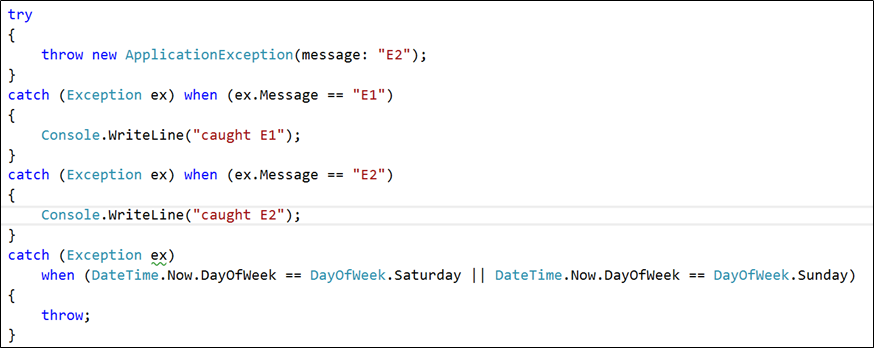